In [19]:
from WindPy import *
import datetime
import matplotlib.pyplot as plt

In [2]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [3]:
import pandas as pd
import numpy as np

In [4]:
code=['ACN.N','TWTR.N','TSLA.O','AAPL.O','ATVI.O','AMZN.O','BAC.N','GE.N','F.N']

In [5]:
def database(codelist,Days,ret='0'):
    ##
    # if ret=0, return a time series#
    #if ret=1,return a return series#
    
    now = datetime.datetime.now()
    delta = datetime.timedelta(days=Days)
    old=now-delta
    a=now.strftime('%Y-%m-%d')
    b=old.strftime('%Y-%m-%d')
    data=pd.DataFrame()
    for i in codelist:
        data[i]=w.wsd(i,"close",b,a,"Period=M;Fill=Previous").Data[0]
    if ret=='0':           
        return data
    elif ret=='1':
        retu=pd.DataFrame()
        for j in range(len(code)):
            lis=[]
            for i in range(len(data)-1):
                lis.append((data.iloc[i+1,j]-data.iloc[i,j])/data.iloc[i,j])
            retu[code[j]]=lis
        return retu
    else:
        return "Invalid Input"

In [46]:
return_matrix=pd.read_csv('stocks.csv')
return_matrix.head()

,Code,SPX.GI,ATVI.O,AMZN.O,KO.N,XOM.N,BAC.N,PFE.N,GE.N,INTC.O,EIX.N
0,Name,NaN,Activision Blizzard,Amazon.com Inc.,Coca-Cola Company,Exxon Mobil Corp.,Bank of America Corp,Pfizer Inc.,General Electric,Intel Corp.,Edison Int'l
1,Sector,Benchmark,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Utilities
2,2007/1/31,0.014059085,-0.012761021,-0.045362392,-0.007668394,-0.03301579,-0.01517138,0.013127413,-0.031174415,0.035061728,-0.010993843
3,2007/2/28,-0.021846145,-0.017626322,0.039023095,-0.025062657,-0.03265857,-0.033282617,-0.048780488,-0.031622746,-0.052480916,0.044908848
4,2007/3/30,0.009979955,0.13277512,0.016607052,0.028277635,0.052594866,0.00373795,0.012019231,0.012890289,-0.036757301,0.045319149


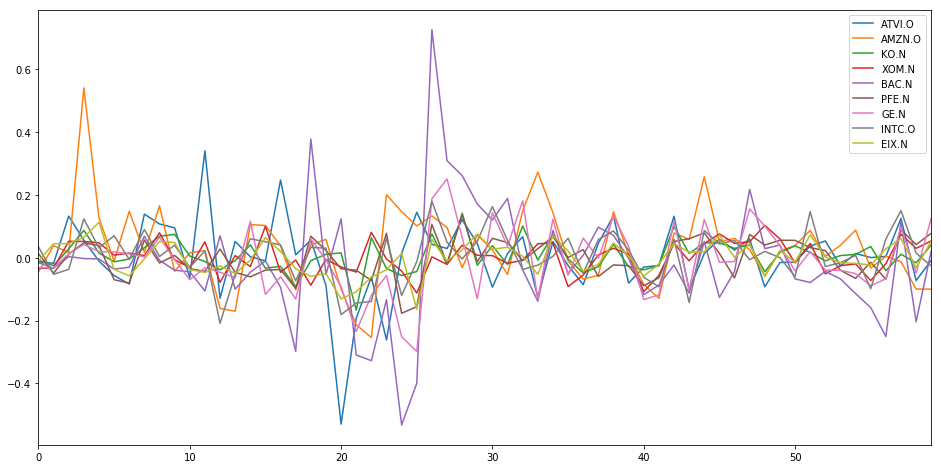

In [22]:
#return_matrix=database(code,365,'1')


return_mat=return_matrix.iloc[2:62,2:].astype(float)
#return_matrix=return_matrix.drop([0,1])
type(return_matrix)
return_mat=return_mat.reset_index(drop=True)
return_mat.plot(figsize=(16,8))

In [23]:
cov_return=return_mat.cov()
cov_return

,ATVI.O,AMZN.O,KO.N,XOM.N,BAC.N,PFE.N,GE.N,INTC.O,EIX.N
ATVI.O,0.014447,0.002917,0.001764,0.001029,0.001605,0.000049,0.002758,0.003961,0.002613
AMZN.O,0.002917,0.015662,0.002253,0.001471,0.003017,0.001219,0.003436,0.004853,0.002407
KO.N,0.001764,0.002253,0.002520,0.001038,0.003635,0.001512,0.003090,0.001225,0.001239
XOM.N,0.001029,0.001471,0.001038,0.002621,0.001333,0.001134,0.002162,0.001414,0.001283
BAC.N,0.001605,0.003017,0.003635,0.001333,0.034519,0.007367,0.014293,0.006534,0.003302
PFE.N,0.000049,0.001219,0.001512,0.001134,0.007367,0.004006,0.004053,0.001757,0.001440
GE.N,0.002758,0.003436,0.003090,0.002162,0.014293,0.004053,0.011733,0.004619,0.002675
INTC.O,0.003961,0.004853,0.001225,0.001414,0.006534,0.001757,0.004619,0.006572,0.002094
EIX.N,0.002613,0.002407,0.001239,0.001283,0.003302,0.001440,0.002675,0.002094,0.002854


In [29]:
cov_inv=pd.DataFrame(np.linalg.pinv(cov_return.values), cov_return.columns, cov_return.index)
cov_inv

,ATVI.O,AMZN.O,KO.N,XOM.N,BAC.N,PFE.N,GE.N,INTC.O,EIX.N
ATVI.O,103.494625,14.194464,-69.907512,23.809238,8.504173,55.387312,-1.762369,-62.282054,-77.531888
AMZN.O,14.194464,95.438618,-79.559113,11.844717,9.711579,18.377578,7.028364,-74.597525,-36.636276
KO.N,-69.907512,-79.559113,772.784791,-107.750992,-2.716295,-133.523236,-132.783492,129.655878,-56.019304
XOM.N,23.809238,11.844717,-107.750992,588.523943,62.950415,-83.337226,-73.942830,-66.212886,-162.480310
BAC.N,8.504173,9.711579,-2.716295,62.950415,77.010542,-74.751820,-70.281699,-30.543309,-6.205133
PFE.N,55.387312,18.377578,-133.523236,-83.337226,-74.751820,531.303129,-28.082446,-15.588391,-114.619130
GE.N,-1.762369,7.028364,-132.783492,-73.942830,-70.281699,-28.082446,254.142403,-61.133030,-11.286596
INTC.O,-62.282054,-74.597525,129.655878,-66.212886,-30.543309,-15.588391,-61.133030,327.080084,-46.063144
EIX.N,-77.531888,-36.636276,-56.019304,-162.480310,-6.205133,-114.619130,-11.286596,-46.063144,658.993017


In [30]:
avg_return=np.array(return_mat.mean())
avg_return.T

array([ 0.00279621,  0.03213442,  0.00745823,  0.00297851, -0.0196207 ,
       -0.00098078, -0.00614131,  0.00631807, -0.00012891])

In [31]:
ones=np.ones(len(code))
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [86]:
##
##  a = mean_AssetReturn'*inv(cov_AssetReturn)*mean_AssetReturn;
##  b = mean_AssetReturn'*inv(cov_AssetReturn)*I;
##  c = I'*inv(cov_AssetReturn)*I;
##  d = a*c - b^2;
##

In [37]:
a=np.dot(np.dot(avg_return,cov_inv),avg_return.T)
b=np.dot(np.dot(avg_return,cov_inv),ones)
c=np.dot(np.dot(ones,cov_inv),ones)
d=a*c-b**2
d

77.71935029526495

In [48]:
weight_tg=np.dot(cov_inv,avg_return)*100/b
weight_tg

array([ -8.41169768,  51.51923466, 127.14765694,   8.43971417,
       -19.56860282,  15.08018583, -43.03303215,  35.49618611,
       -66.66964506])

In [49]:
sum(weight_tg)

99.99999999999991

In [50]:
for i in range(len(code)):
    print(code[i],' ', "%.2f" %weight_tg[i])

ACN.N   -8.41
TWTR.N   51.52
TSLA.O   127.15
AAPL.O   8.44
ATVI.O   -19.57
AMZN.O   15.08
BAC.N   -43.03
GE.N   35.50
F.N   -66.67
